In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv(r"E:\Jupyter Notebooks\train.csv")[['Survived','Pclass','Age','Fare']]


In [132]:
df.tail()

,Survived,Pclass,Age,Fare
886,0,2,27.0,13.00
887,1,1,19.0,30.00
888,0,3,NaN,23.45
889,1,1,26.0,30.00
890,0,3,32.0,7.75


In [133]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

<AxesSubplot:ylabel='Density'>

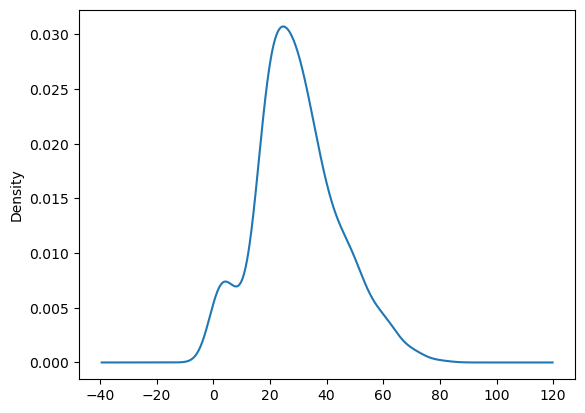

In [134]:
df['Age'].plot(kind = 'kde')

<AxesSubplot:>

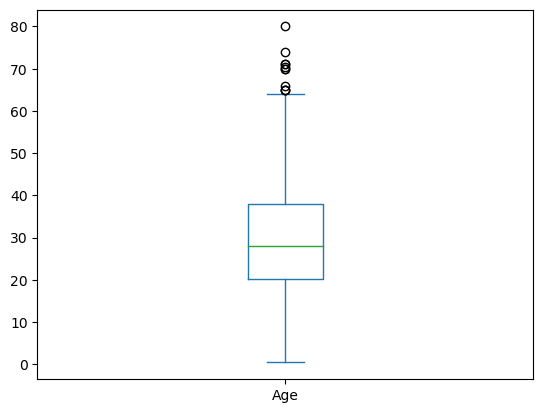

In [135]:
df['Age'].plot(kind = 'box')

In [136]:
# the age column seams to be skewed but we generally try the z score outlier removal on normal data


In [137]:
df.shape

(891, 4)

E:\data_science_apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\data_science_apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

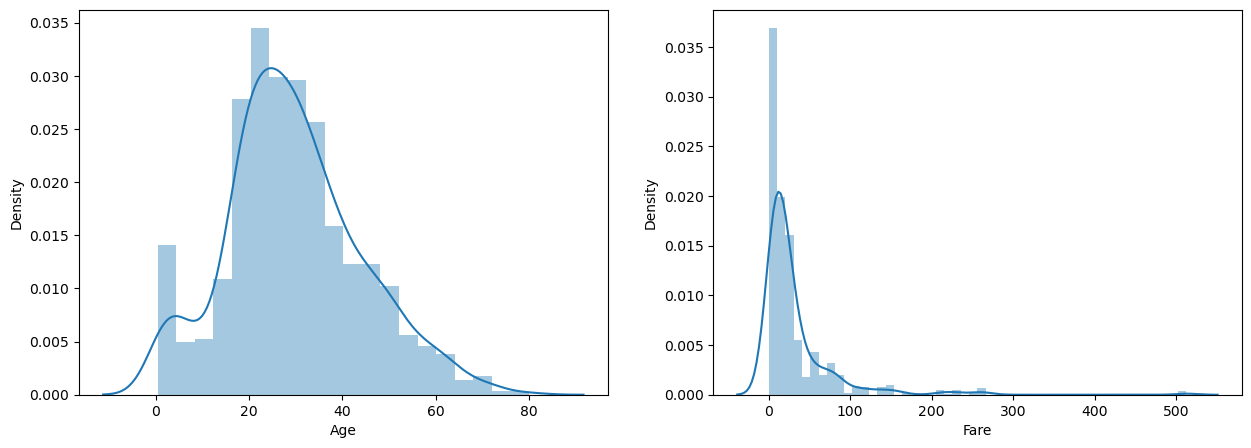

In [138]:
#fig , (ax1,ax2) = plt.subplots(1,2,figsize= (10,2)) , use this when u can give axis as parameter
# in distplot there is no such parameter
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['Age'])
plt.subplot(122)
sns.distplot(df['Fare'])

In [139]:
df['Age'].skew() # its slightly skewed

0.38910778230082704

In [140]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [141]:
# max boundary values allowed in a normal distriution
mean = df['Age'].mean()
sigma = df['Age'].std()

mean+3*sigma , mean-3*sigma

(73.27860964406095, -13.88037434994331)

In [142]:
#finding outliers
df[(df['Age'] > mean+3*sigma)  | (df['Age'] < mean-3*sigma)] # without () and | it gives error with or

,Survived,Pclass,Age,Fare
630,1,1,80.0,30.000
851,0,3,74.0,7.775


### Trimming

In [143]:
newdf = df[(df['Age']>mean-3*sigma) & (df['Age']<mean+3*sigma)]
newdf.sample(5)

,Survived,Pclass,Age,Fare
535,1,2,7.0,26.2500
99,0,2,34.0,26.0000
203,0,3,45.5,7.2250
381,1,3,1.0,15.7417
487,0,1,58.0,29.7000


In [144]:
df.shape

(891, 4)

In [145]:
newdf.shape

(712, 4)

In [146]:
891-712

179

 it removed all the null values , don't know why here's how
 
    If there are null values (NaN) in the 'Age' column, the comparison operations will result in False for those rows because any comparison with NaN returns False.
This means that rows with null values in the 'Age' column will not be included in the new DataFrame newdf.


In [147]:
df2 = pd.read_csv(r"E:\Jupyter Notebooks\placement.csv")

In [148]:
df2.tail()

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1
999,4.90,10.0,1


In [149]:
df2.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [150]:
# there are no null values in this table so trimming outliers won'nt trim nulls 

E:\data_science_apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\data_science_apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

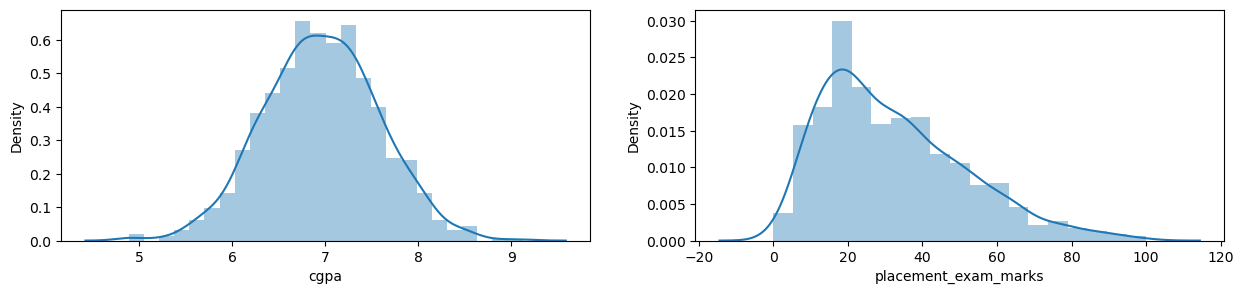

In [151]:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.distplot(df2['cgpa'])
plt.subplot(122)
sns.distplot(df2['placement_exam_marks'])

In [152]:
newdf2 = df2[(df2['cgpa'] > df2['cgpa'].mean()-3*df2['cgpa'].std()) & 
(df2['cgpa'] < df2['cgpa'].mean()+3*df2['cgpa'].std())]

In [153]:
newdf2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [154]:
df2.shape, newdf2.shape

((1000, 3), (995, 3))

### Z-score normalization

it is same as the above approach

In [155]:
# calculating the z score
df2['cgpa_zscore'] = (df2['cgpa'] - df2['cgpa'].mean())/df2['cgpa'].std()

In [156]:
df2[(df2['cgpa_zscore']<3) & (df2['cgpa_zscore']>-3)] # trimming same as newdf

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### Capping

fixing the outlier values with the required highest in a the column and the required lowest in the col

In [157]:
df2.shape

(1000, 4)

<AxesSubplot:>

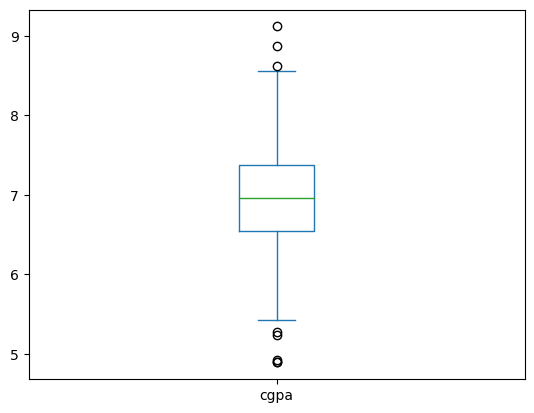

In [158]:
df2['cgpa'].plot(kind = 'box')

In [159]:
df2['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [160]:
lower_limit = df2['cgpa'].mean()-3*df2['cgpa'].std()
upper_limit = df2['cgpa'].mean()+3*df2['cgpa'].std()


In [161]:
lower_limit, upper_limit

(5.113546374602842, 8.808933625397177)

In [162]:
df2['cgpa'] = np.where(df2['cgpa'] > upper_limit,
         upper_limit, np.where(df2['cgpa']<lower_limit, lower_limit, df2['cgpa']))

In [163]:
df2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


<AxesSubplot:>

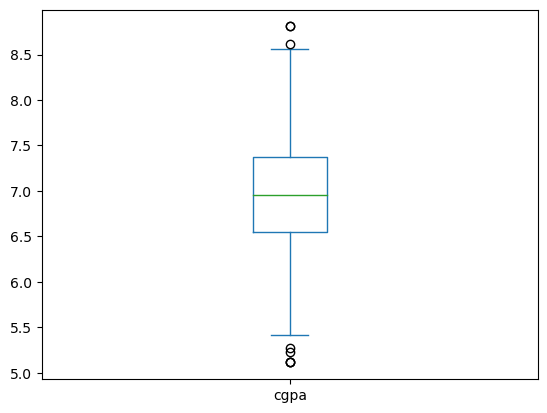

In [164]:
df2['cgpa'].plot(kind = 'box')

In [165]:
df2.cgpa.describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

In [166]:
df2.shape

(1000, 4)

In [169]:
df.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64